## Imports


In [124]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import numpy as np
import pandas as pd
from scipy.io import wavfile
import matplotlib.pyplot as plt
import matplotlib as mpl

## Use full methods

In [127]:
def song_plotter(rate,data):
    mpl.style.use('seaborn')
    time = np.linspace(0, len(data)/rate, num=len(data))
    plt.figure(1)
    plt.title('Signal Wave...')
    plt.plot(time, data)
    plt.show()

In [143]:
def compare_plotter(title,rate,test_data,preddicted_data):
    mpl.style.use('seaborn')
    time = np.linspace(0,len(test_data)/rate, num=len(test_data))
    
    plt.figure(2)
    plt.title(title)
    plt.plot(time,test_data, label='test data')
    plt.plot(time,preddicted_data, 'g', label='test data')
    plt.show()
    

In [164]:
def split_song_by_seconds(rate,data,seconds,start_time=0):
    split_point = int(start_time + (rate*seconds))
    
    first_part = data[start_time:split_point]
    second_part = data[split_point:]
    
    return first_part, split_point

## Getting data

In [23]:
song_path = 'songs/hakuna_matata.wav'
rate, data = wavfile.read(song_path) #Read the song

In [24]:
print('rate -> ', rate, ' Data len -> ',len(data))

rate ->  44100  Data len ->  11026432


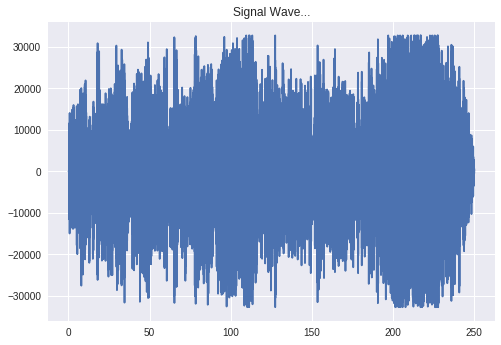

In [128]:
song_plotter(rate,data)

In [156]:
first_part,splited_point = split_song_by_seconds(rate,data,30)

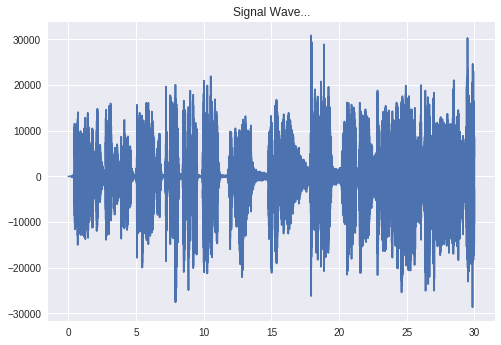

In [157]:
song_plotter(rate,first_part)

## Simple Exponential Smoothing

In [165]:
training_data = first_part
test_data, splitted_test_point = split_song_by_seconds(rate,data,seconds = 0.5,start_time = splited_point)

print(splited_point)
print(splitted_test_point)


1323000
1345050


### Simple Exponential Smoothing (SES)

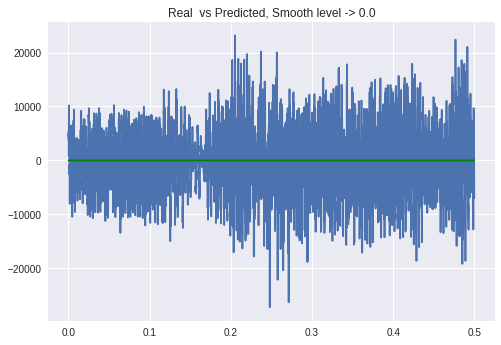

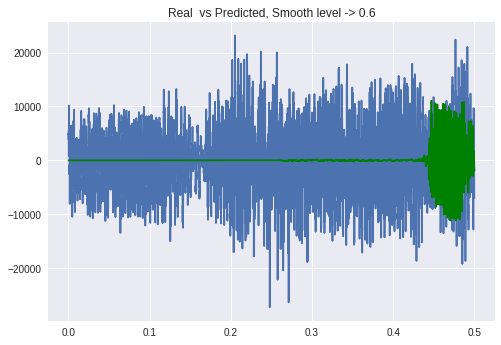

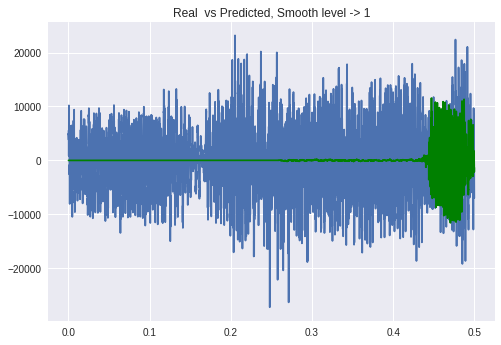

In [166]:
smoothing_levels = [0.0,0.6,1]

for smooth_level in smoothing_levels:
    fit1 = SimpleExpSmoothing(training_data).fit(smoothing_level=smooth_level,optimized=False)
    fcast1 = fit1.predict(start=0,end=len(test_data)-1)
    if((len(fcast1) - len(test_data))==0):
        compare_plotter('Real  vs Predicted, Smooth level -> '+ str(smooth_level),rate,test_data,fcast1)
    else:
        print('There is a problem with lengths')

where 0≤ α ≤1 is the smoothing parameter.

The weights decrease rate is controlled by the smoothing parameter α. If α is large (i.e., close to 1), more weight is given to the more recent observations. There are 2 extreme cases:

* α=0: the forecasts of all future values are equal to the average (or “mean”) of the historical data, which is called Average method.
* α=1: simply set all forecasts to be the value of the last observation, which is called Naive method in statistics.

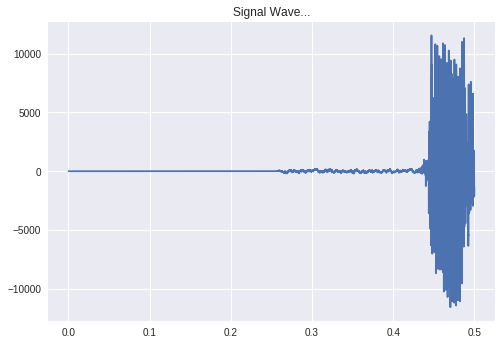

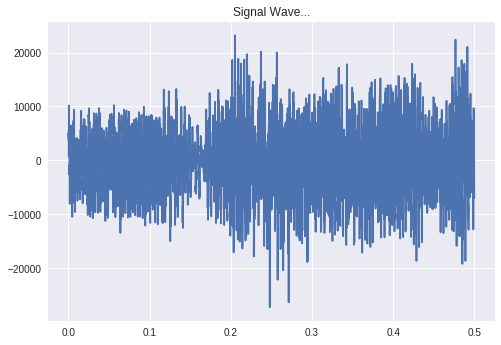

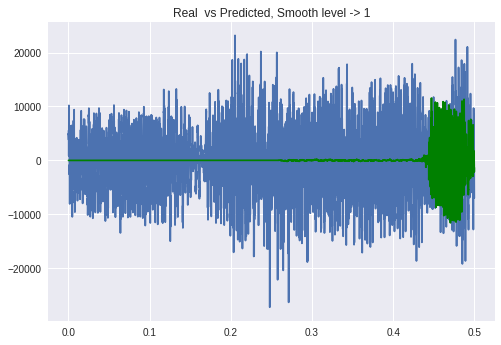

In [167]:
fit1 = SimpleExpSmoothing(training_data).fit()
#compare_plotter('Real  vs learing',rate,training_data,fit1)
fcast1 = fit1.predict(start=0,end=len(test_data)-1)

if((len(fcast1) - len(test_data))==0):
    song_plotter(rate,fcast1)
    song_plotter(rate,test_data)
    compare_plotter('Real  vs Predicted, Smooth level -> '+ str(smooth_level),rate,test_data,fcast1)
else:
    print('There is a problem with lengths','FC -> ',len(fcast1),'test ->',len(test_data))

###### 